## Предварительная обработка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
df=pd.read_csv('films_result.csv', sep=';') 

In [3]:
df.head(20)

,Русское название,Оригинальное название,Год,Рейтинг IMDb,Страна,Режиссер,Бюджет ($),Cборы в Мире ($),Ссылка
0,Туз в рукаве,Ace in the Hole,1951,8.0,США,Билли Уайлдер,1800000.0,2300000.0,https://ru.kinorium.com/41033/
1,Эйс Вентура: Розыск домашних животных,Ace Ventura: Pet Detective,1993,7.0,США,Том Шэдьяк,15000000.0,107217396.0,https://ru.kinorium.com/99229/
2,Месть актера,Yukinojô henge,1963,7.0,Япония,Кон Итикава,11398150.0,50042441.0,https://ru.kinorium.com/54246/
3,Зависимость,The Addiction,1994,6.0,США,Абель Феррара,11398150.0,307308.0,https://ru.kinorium.com/102068/
4,Страховой агент,The Adjuster,1991,7.0,Канада,Атом Эгоян,1500000.0,396573.0,https://ru.kinorium.com/92500/
5,Приключения Бакару Банзая в восьмом измерении,The Adventures of Buckaroo Banzai Across the 8...,1984,6.0,США,У. Д. Рихтер,11398150.0,6254148.0,https://ru.kinorium.com/79880/
6,Приключения Робин Гуда,The Adventures of Robin Hood,1938,8.0,США,Майкл Кёртиц,1900000.0,3981000.0,https://ru.kinorium.com/28192/
7,После работы,After Hours,1985,8.0,США,Мартин Скорсезе,4500000.0,10609321.0,https://ru.kinorium.com/81475/
8,"Агирре, гнев божий",Aguirreder Zorn Gottes,1972,8.0,"Германия (ФРГ), Мексика",Вернер Херцог,370000.0,37041.0,https://ru.kinorium.com/63490/
9,Аэроплан,Airplane!,1980,8.0,США,Джим Абрахамс,3500000.0,83453539.0,https://ru.kinorium.com/74115/


In [4]:
print('Количество уникальных значений для каждого столбца (df.nunique()):\n', df.nunique())

Количество уникальных значений для каждого столбца (df.nunique()):
 Русское название         1000
Оригинальное название    1000
Год                        91
Рейтинг IMDb                4
Страна                    173
Режиссер                  603
Бюджет ($)                223
Cборы в Мире ($)          817
Ссылка                   1000
dtype: int64


Итак, наша таблица содержит 8 столбцов с полезными для нашего анализа переменными. Столбцы с текстовыми данными - Русское название, Оригинальное название, Страна и Режиссер. Столбцы с числовыми данными - Год, Рейтинг IMDb, Бюджет и Cборы в Мире. Все пропуски мы уже заполнили средними значениями.

**Посмотрим на плотность распределения рейтинга фильмов в нашем топе:**

<AxesSubplot:title={'center':'Плотность распределения рейтинга фильмов'}, xlabel='Рейтинг IMDb', ylabel='Density'>

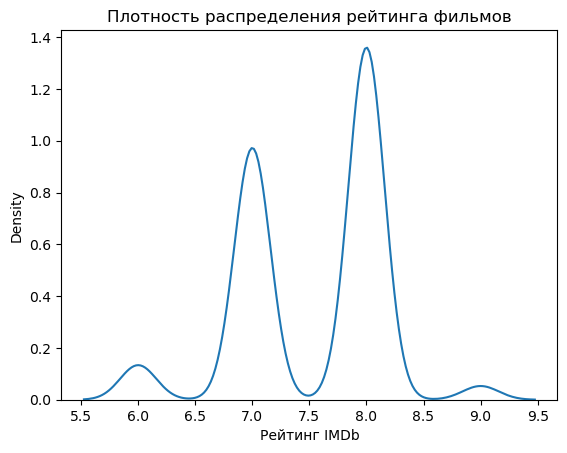

In [5]:
rating = df['Рейтинг IMDb']
plt.title('Плотность распределения рейтинга фильмов')
sns.kdeplot(rating)

**Посмотрим топ 20 фильмов по бюджету и по сборам по миру:**

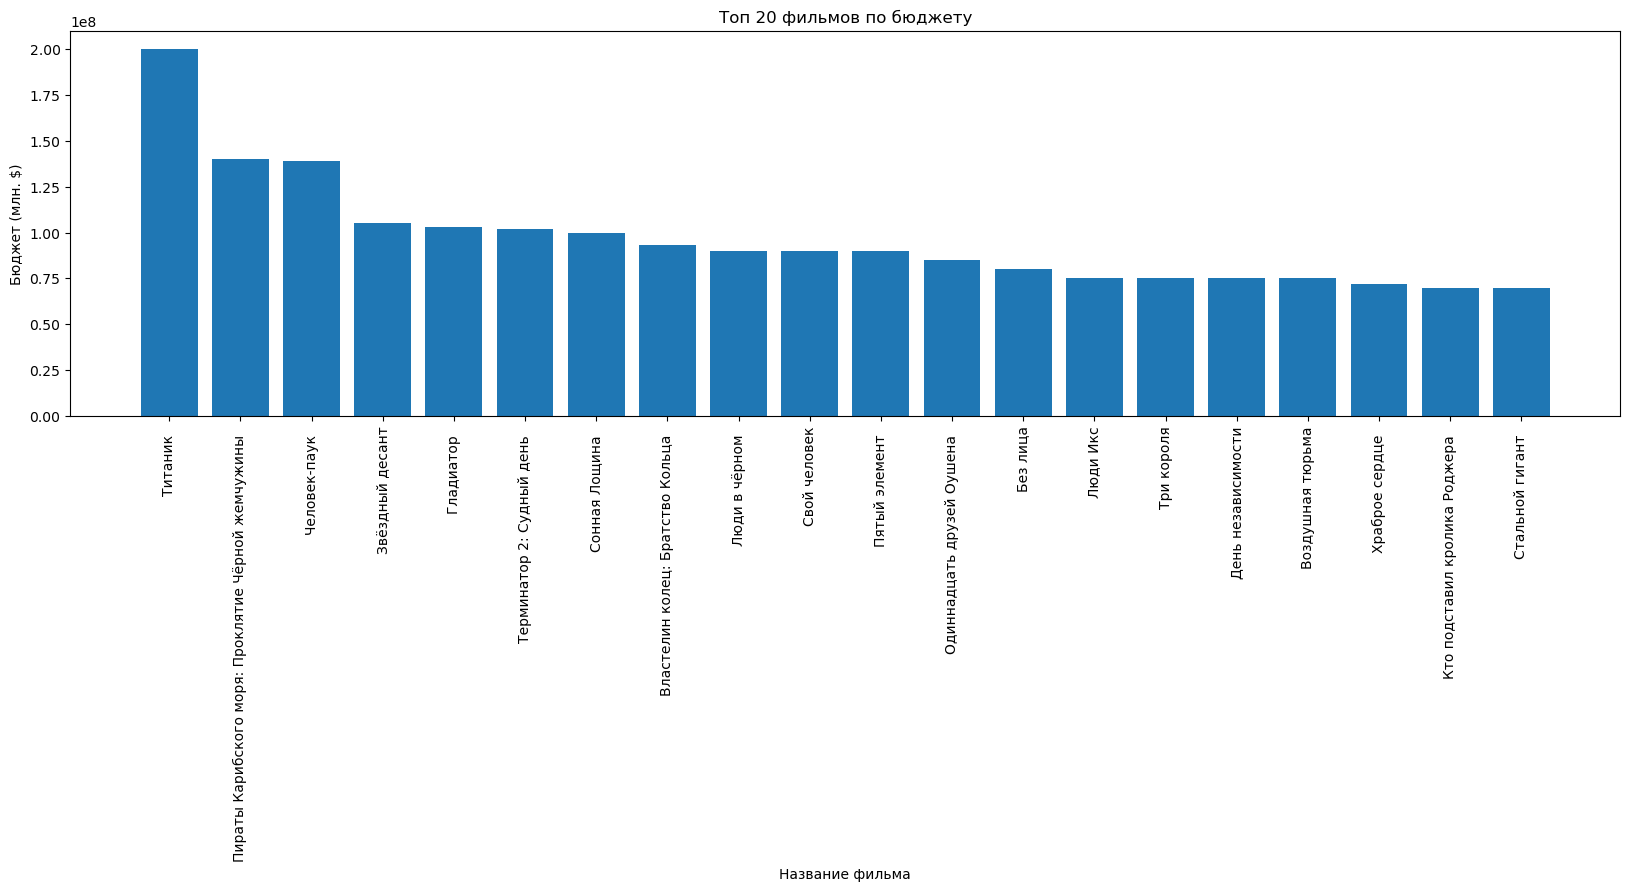

In [31]:
sorted_df_budget = df.sort_values(by='Бюджет ($)', ascending=False)
top_20_budget = sorted_df_budget.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_budget['Русское название'], top_20_budget['Бюджет ($)'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Бюджет (млн. $)') 
plt.title('Топ 20 фильмов по бюджету') 
plt.show() 

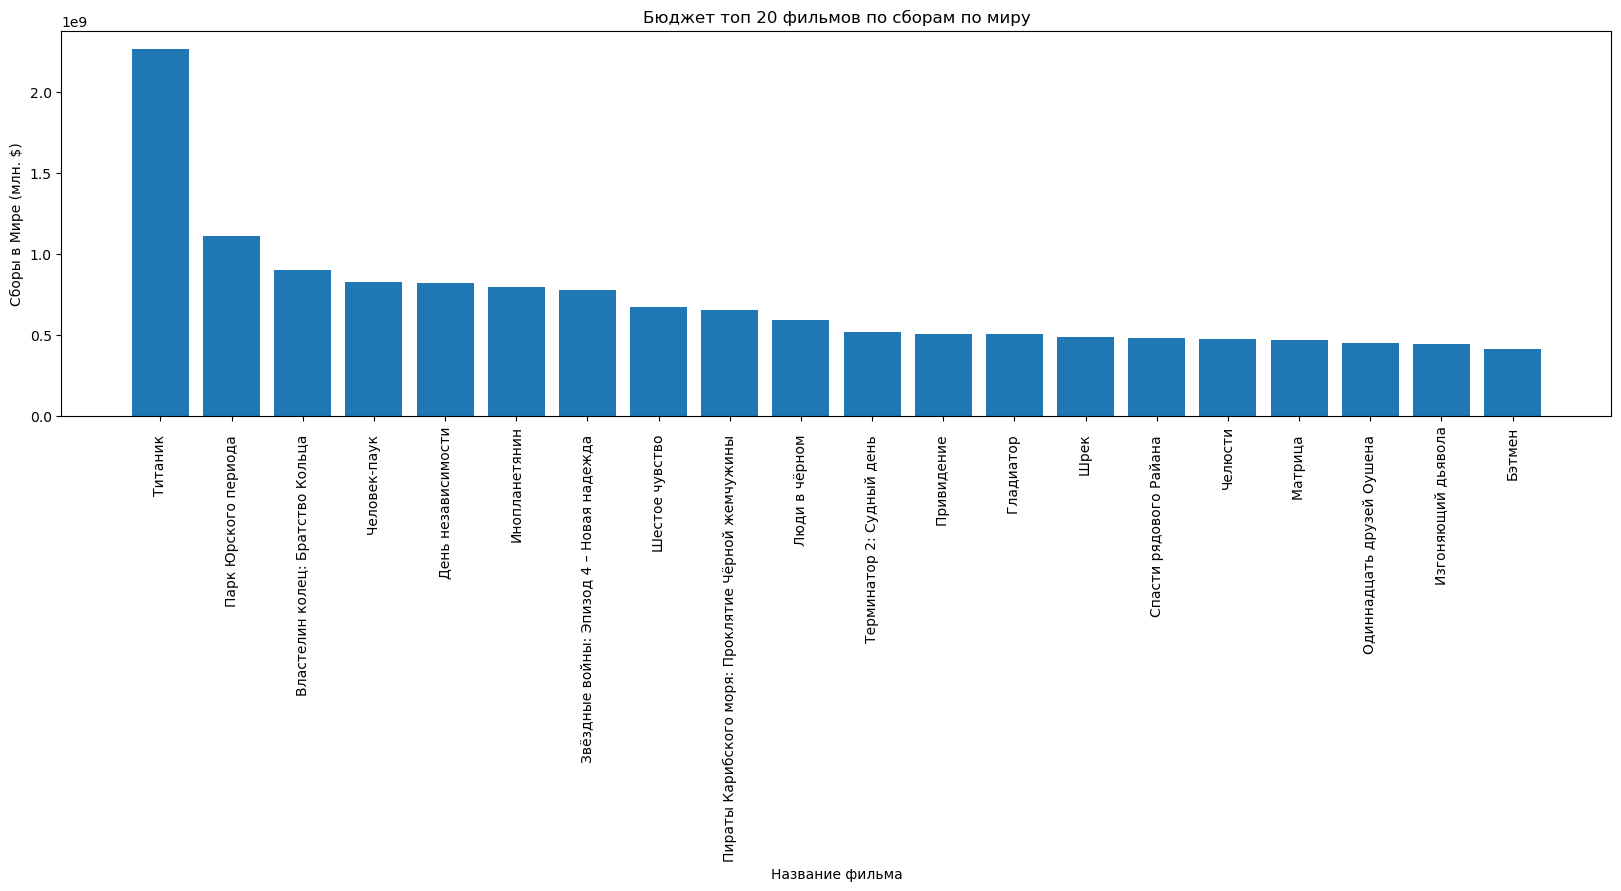

In [32]:
sorted_df_sbor = df.sort_values(by='Cборы в Мире ($)', ascending=False)
top_20_sbor = sorted_df_sbor.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_sbor['Русское название'], top_20_sbor['Cборы в Мире ($)'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Cборы в Мире (млн. $)') 
plt.title('Бюджет топ 20 фильмов по сборам по миру') 
plt.show() 

**Посмотрим, какой был бюджет у фильмов с самым высоким рейтингом:**

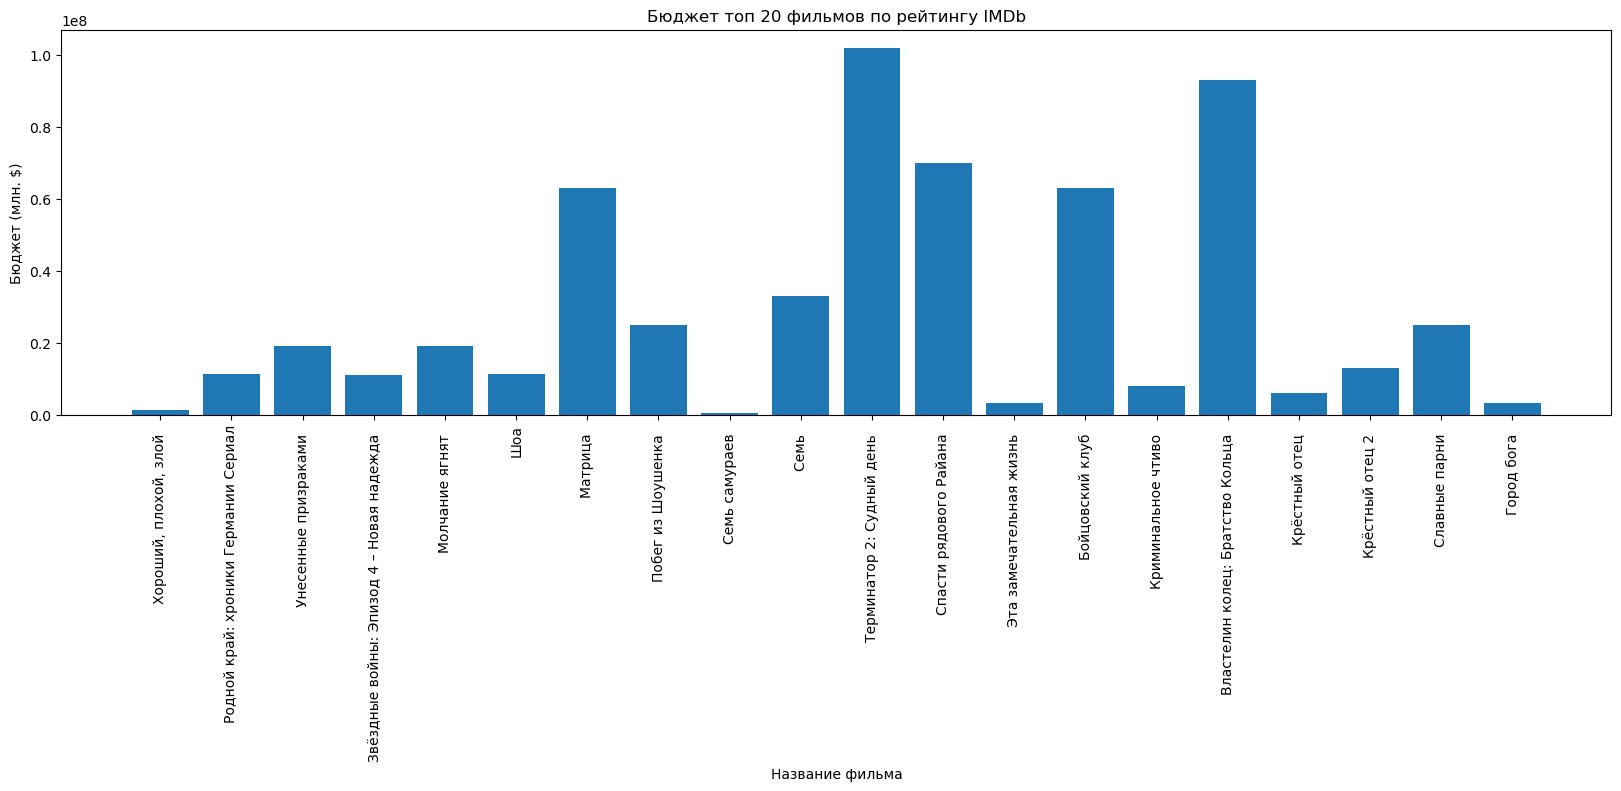

In [33]:
sorted_df_rating = df.sort_values(by='Рейтинг IMDb', ascending=False)
top_20_rating = sorted_df_rating.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_rating['Русское название'], top_20_rating['Бюджет ($)'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Бюджет (млн. $)') 
plt.title('Бюджет топ 20 фильмов по рейтингу IMDb') 
plt.show() 

,Бюджет ($),Cборы в Мире ($)
Бюджет ($),1.000000,0.685611
Cборы в Мире ($),0.685611,1.000000


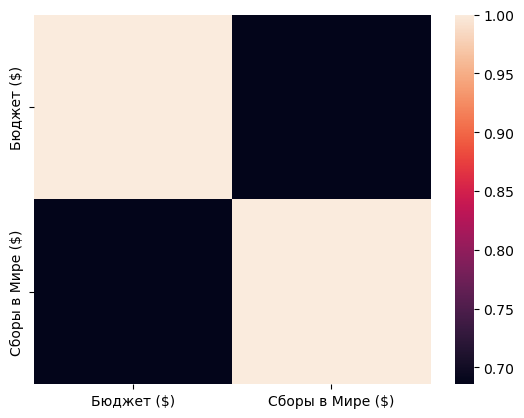

In [34]:
sns.heatmap(df[['Бюджет ($)', 'Cборы в Мире ($)']].corr())
df[['Бюджет ($)', 'Cборы в Мире ($)']].corr()

**Вывод:** Как мы видим по этому хитмапу, если брать все фильмы, то корреляция между бюджетами и сборами по миру составляет 0,69. Это больше, чем 0,5, значит между ними есть положительная линейная связь. 

**Посмотрим на график их зависимости друг от друга:**

Text(0, 0.5, 'Сборы по миру (млн $)')

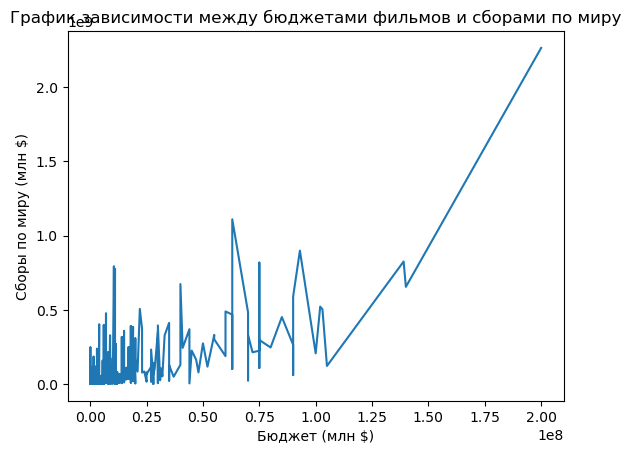

In [39]:
plt.plot(sorted_df_budget['Бюджет ($)'], sorted_df_budget['Cборы в Мире ($)'])
plt.title('График зависимости между бюджетами фильмов и сборами по миру')
plt.xlabel('Бюджет (млн $)')
plt.ylabel('Сборы по миру (млн $)')

**Посмотрим, в какой год выходило наибольшее количество фильмов из нашего топ-листа:**

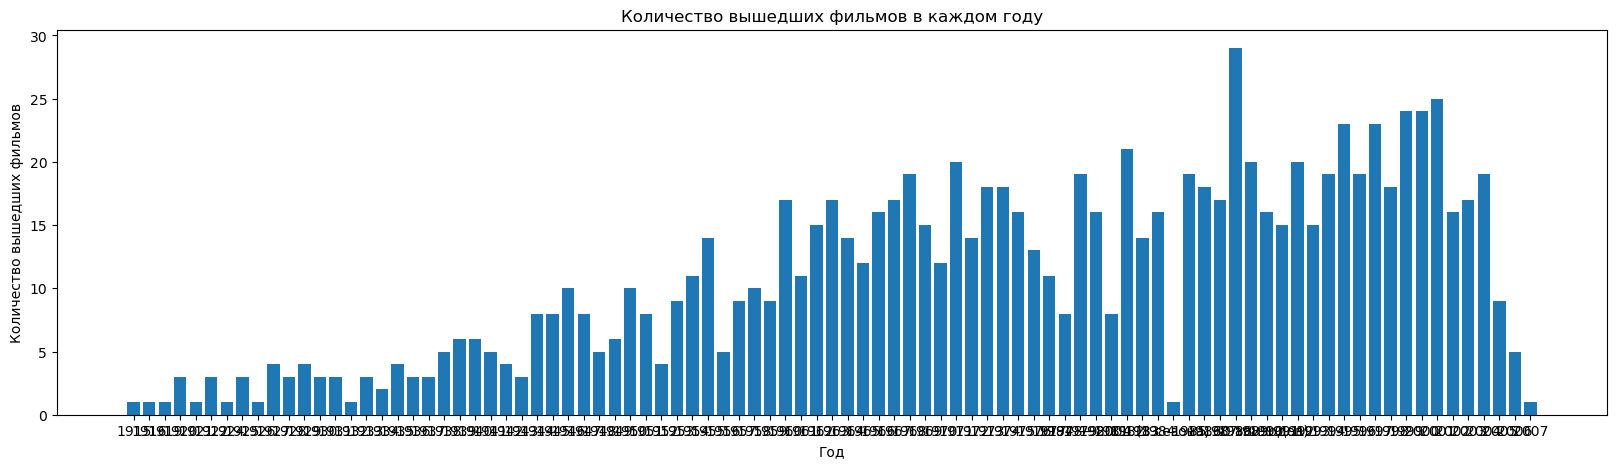

In [41]:
sorted_df_year = df.sort_values(by='Год', ascending=True)
popular = sorted_df_year['Год'].value_counts()
popular = popular.sort_index(ascending=True)
plt.figure(figsize=(20,5))
plt.bar(popular.keys(), popular.values)
plt.title('Количество вышедших фильмов в каждом году')
plt.xlabel('Год')
plt.ylabel('Количество вышедших фильмов')
plt.show()

In [12]:
sorted_df_year['Год'].value_counts().head(20)

1988    29
2001    25
2000    24
1999    24
1997    23
1995    23
1982    21
1989    20
1992    20
1971    20
1985    19
1979    19
1968    19
2004    19
1994    19
1996    19
1998    18
1986    18
1973    18
1974    18
Name: Год, dtype: int64

**Вывод:** Можно сделать вывод, что фильмы 1988 года были самыми популярными в топе с этого сайта, все советуют нам смотреть фильмы 80-90-ых годов :)

## Создание новых признаков

**Создадим будущую переменную для машинного обучения, а именно прибыль для каждого фильма, равную разности между сборами по миру и бюджетом:**

In [13]:
df['Прибыль ($)'] = df['Cборы в Мире ($)'] - df['Бюджет ($)']

In [14]:
df

,Русское название,Оригинальное название,Год,Рейтинг IMDb,Страна,Режиссер,Бюджет ($),Cборы в Мире ($),Ссылка,Прибыль ($)
0,Туз в рукаве,Ace in the Hole,1951,8.0,США,Билли Уайлдер,1800000.0,2300000.0,https://ru.kinorium.com/41033/,500000.0
1,Эйс Вентура: Розыск домашних животных,Ace Ventura: Pet Detective,1993,7.0,США,Том Шэдьяк,15000000.0,107217396.0,https://ru.kinorium.com/99229/,92217396.0
2,Месть актера,Yukinojô henge,1963,7.0,Япония,Кон Итикава,11398150.0,50042441.0,https://ru.kinorium.com/54246/,38644291.0
3,Зависимость,The Addiction,1994,6.0,США,Абель Феррара,11398150.0,307308.0,https://ru.kinorium.com/102068/,-11090842.0
4,Страховой агент,The Adjuster,1991,7.0,Канада,Атом Эгоян,1500000.0,396573.0,https://ru.kinorium.com/92500/,-1103427.0
...,...,...,...,...,...,...,...,...,...,...
995,Затоiчи,Zatôichi,2003,8.0,Япония,Такеши Китано,11398150.0,34196922.0,https://ru.kinorium.com/284378/,22798772.0
996,Зази в метро,Zazie dans le métro,1960,7.0,Франция,Луи Маль,11398150.0,50042441.0,https://ru.kinorium.com/51271/,38644291.0
997,Ноль за поведение,Zéro de conduite: Jeunes diables au collège,1933,7.0,Франция,Жан Виго,11398150.0,50042441.0,https://ru.kinorium.com/23351/,38644291.0
998,Образцовый самец,Zoolander,2001,6.0,"США, Германия, Австралия",Бен Стиллер,28000000.0,60780981.0,https://ru.kinorium.com/161388/,32780981.0


In [15]:
popular_countries = df['Страна'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame(name='Страна')
country_counts = popular_countries['Страна'].value_counts()
print(country_counts)

США               569
Великобритания    193
Франция           168
Италия             73
Япония             39
Германия           36
Германия (ФРГ)     28
Канада             24
Испания            19
Австралия          18
Мексика            18
Швеция             16
СССР               14
Гонконг            14
Дания              10
Индия               9
Швейцария           8
Иран                7
Китай               7
Австрия             6
Польша              5
Нидерланды          5
Южная Корея         5
Тайвань             4
Новая Зеландия      4
Венгрия             4
Чехословакия        4
Бразилия            4
Ирландия            3
Югославия           3
Россия              3
Бельгия             3
Турция              2
Португалия          2
Буркина-Фасо        2
Куба                2
Алжир               2
Аргентина           2
Марокко             2
Ямайка              1
Болгария            1
Югославия (ФР)      1
Сенегал             1
Мальта              1
Афганистан          1
Вьетнам   

**Вывод:** Можно заметить, что больше половины фильмов из списка было снято в США. Давайте проверим, связана ли страна производства с прибылью.

## Проверка гипотез

Итак, выдвинем гипотезу о том, что фильмы, снятые в США, собирают столько же денег, что и фильмы, снятых в других странах. Проверим гипотезу на уровне значимости 5%.

$$
\begin{aligned}
& H_0: \mu_{USA} = \mu_{other} \hspace{2mm} \text{(Прибыль фильмов, снятых в США, такая же, как и прибыль фильмов, снятых в других странах)}\\
& H_1: \mu_{USA} > \mu_{other} \hspace{2mm} \text{(Прибыль фильмов, снятых в США, больше прибыли фильмов, снятых в других странах)}
\end{aligned}
$$

**Используем критерий Манна-Уитни.**

In [16]:
usa_income = df.loc[df['Страна'].str.contains('США'), 'Прибыль ($)']
other_income = df.loc[~df['Страна'].str.contains('США'), 'Прибыль ($)']

In [17]:
usa_income

0         500000.0
1       92217396.0
3      -11090842.0
5       -5144002.0
6        2081000.0
          ...     
985    221339528.0
989     -2721425.0
991    -10124889.0
993     83473333.0
998     32780981.0
Name: Прибыль ($), Length: 569, dtype: float64

In [18]:
other_income

2      38644291.0
4      -1103427.0
8       -332959.0
10     -8145452.0
11     38644291.0
          ...    
994   -11314845.0
995    22798772.0
996    38644291.0
997    38644291.0
999     6280000.0
Name: Прибыль ($), Length: 431, dtype: float64

In [19]:
sts.mannwhitneyu(usa_income, other_income, alternative='greater')

MannwhitneyuResult(statistic=176415.0, pvalue=5.634125251209793e-33)

**Вывод:** так как p-value меньше 5%, нулевая гипотеза отвергается в пользу альтернативной.

Критерий Манна-Уитни применяется для сравнения выборочных средних для распределений, отличных от нормального, значения которых могут быть упорядочены. 

Предпосылки критерия Манна-Уитни: в каждой из выборок наблюдения независимо идентично распределены и значения случайных величин могут быть упорядочены. Нормальность данных можно проверить с помощью теста функцией normaltest. Гипотеза о нормальности данных отвергается на всех уровнях значимости, поэтому мы применяем не двухыборочный t-тест.

**Проверим выполнение предпосылок критерия на наших данных:**

Text(0.5, 1.0, 'Распределение прибыли фильмов, снятых в США')

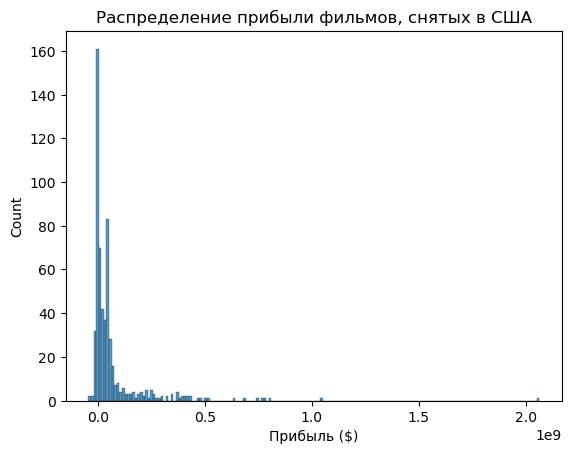

In [50]:
sns.histplot(usa_income)
plt.title('Распределение прибыли фильмов, снятых в США')

In [21]:
sts.normaltest(usa_income)

NormaltestResult(statistic=734.1594870577769, pvalue=3.795709501001022e-160)

Text(0.5, 1.0, 'Распределение прибыли фильмов, снятых в других странах')

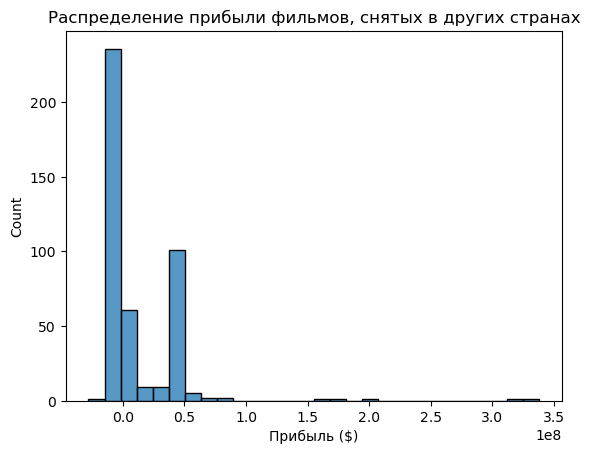

In [51]:
sns.histplot(other_income)
plt.title('Распределение прибыли фильмов, снятых в других странах')

In [23]:
sts.normaltest(other_income)

NormaltestResult(statistic=459.0379716819132, pvalue=2.0949369520784781e-100)

**Вывод:** на обоих графиках видно, что распределение отлично от нормального.

## Машинное обучение

Построим логистическую регрессию для предсказания прибыли на основании всех остальных числовых признаков. 

Рассмотрим зависимость прибыли от рейтинга, года выпуска и бюджета. Предсказывать прибыль в зависимости от бюджета и сборов бессмысленно, так как между ними очевидна линейная зависимость. 

**Посмотрим на рейтинг, год выпуска и бюджет:**

In [42]:
df2 = df[['Год', 'Рейтинг IMDb', 'Бюджет ($)', 'Прибыль ($)']]
df2 = df2[df2['Год'] != '1984 — 2004 (3 сезона, 30 эпизодов)']
df2['Прибыль_новая'] = df2['Прибыль ($)'].apply(lambda x: 1 if x >= 0 else 0)
df2

,Год,Рейтинг IMDb,Бюджет ($),Прибыль ($),Прибыль_новая
0,1951,8.0,1800000.0,500000.0,1
1,1993,7.0,15000000.0,92217396.0,1
2,1963,7.0,11398150.0,38644291.0,1
3,1994,6.0,11398150.0,-11090842.0,0
4,1991,7.0,1500000.0,-1103427.0,0
...,...,...,...,...,...
995,2003,8.0,11398150.0,22798772.0,1
996,1960,7.0,11398150.0,38644291.0,1
997,1933,7.0,11398150.0,38644291.0,1
998,2001,6.0,28000000.0,32780981.0,1


Мы также дополнительно преобразовали датафрейм, а именно убрали ту строку, где речь идет о сериале, у которого нет года выпуска, но есть информация о всех годах съемки и количестве сезонов, ведь регрессия не работает с нечисловыми переменными. Также для построения регрессии мы сделали прибыль бинарной, так как логистическая регрессия работает только с 0 и 1. Вся неотрицательная прибыль заменена на 1, отрицательная - на 0.

In [43]:
from sklearn.preprocessing import MinMaxScaler 

scale_features_mm = MinMaxScaler() 
a = scale_features_mm.fit_transform(df2) 
dfScale = pd.DataFrame(data=a, columns=df2.columns)
dfScale

,Год,Рейтинг IMDb,Бюджет ($),Прибыль ($),Прибыль_новая
0,0.391304,0.666667,0.008980,0.022340,1.0
1,0.847826,0.333333,0.074981,0.065782,1.0
2,0.521739,0.333333,0.056972,0.040407,1.0
3,0.858696,0.000000,0.056972,0.016849,0.0
4,0.826087,0.333333,0.007480,0.021580,0.0
...,...,...,...,...,...
994,0.956522,0.666667,0.056972,0.032901,1.0
995,0.489130,0.333333,0.056972,0.040407,1.0
996,0.195652,0.333333,0.056972,0.040407,1.0
997,0.934783,0.000000,0.139983,0.037630,1.0


Регрессия не любит большие значения, поэтому мы отнормировали данные.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = "Прибыль_новая"

X = dfScale.loc[:, dfScale.columns != target_col]
y = dfScale.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
model_regression = LogisticRegression()
model_regression.fit(X_train, y_train)
y_pred = model_regression.predict(X_test)
model_regression.coef_, model_regression.intercept_

(array([[ 0.39675183, -1.1667914 ,  0.92672735,  5.13688642]]),
 array([0.38171443]))

In [46]:
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.])

Подберем наилучшие параметры для модели логистической регрессии. 
1. использован перебор по сетке
2. в качестве метрики использована ROC AUC
3. для оценки параметров сделана кросс-валидация на 4 фолдах

Мы использовали кросс-валидацию, так как именно она позволяет оценить устойчивость модели при изменении данных. В качестве метрики выбрана ROC AUC, так как она показывает, насколько хорош классификатор и насколько точны предсказания. Также она не зависит от порога.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_solv = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

solv = GridSearchCV(LogisticRegression(random_state=42), param_solv, cv=4, scoring='roc_auc')
solv.fit(X_train, y_train)

param_var = {'C': uniform(loc=0, scale=10)}

random_search = RandomizedSearchCV(model_regression, param_distributions=param_var, scoring='roc_auc', cv=4, random_state=42)

random_search.fit(X_train, y_train)
print(f'Best solver: {solv.best_params_["solver"]}')
print("Лучшее значение: ", random_search.best_params_)
print("ROC AUC для лучшего параметра: ", random_search.score(X_test, y_test))

Best solver: saga
Лучшее значение:  {'C': 9.50714306409916}
ROC AUC для лучшего параметра:  0.8568797953964196


Теперь оценим качество предсказаний модели с помощью precision, recall и accuracy score. 
1. Precision отражает то, насколько мы можем доверять алгоритму, если он спрогнозировал единичку.
2. Recall показывает, как много объектов первого класса наш алгоритм находит, то есть метрика демонстрирует способность алгоритма обнаруживать данный класс вообще.
3. Accuracy показывает долю верно классифицированных объектов.

In [48]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

best_model = LogisticRegression(C=9.50714306409916, solver='sag')
best_model.fit(X_test, y_test)
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("accuracy = ", accuracy_best)

precision_best = precision_score(y_test, y_pred_best)
print("precision = ", precision_best)

recall_best = recall_score(y_test, y_pred_best)
print("recall = ", recall_best)

accuracy =  0.625
precision =  0.6052631578947368
recall =  1.0


**Вывод:** Результаты по всем метрикам неплохие, особенно радуют ROC AUC и recall. Это показывает, что модель предсказывает достаточно точно благодаря подбору гиперпараметров.